<a href="https://colab.research.google.com/github/noambassat/Macabi_Home_Assignment/blob/main/macabi_home_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ydata-profiling --quiet

In [ ]:
pip install sweetviz --quiet

In [ ]:
# IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from scipy import stats
from ydata_profiling import ProfileReport

In [ ]:
df = pd.read_csv('ds_assignment_data.csv')
df.head()

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,smoking_total_heavy_smokers,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,...,secondary_hypertension_sum,essential_hypertension_sum,hypertensive_heart_disease_sum,hypertensive_chronic_kidney_disease_sum,hypertensive_heart_and_chronic_kidney_disease_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,clinical_sheet
0,24163,0.73,33.0,0.0,0.00,0.0,44.9,1.01,90.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8\n\nתלונות: המטופלת מתלוננת על בחילות בב...
1,51373,0.79,34.0,1.0,1.86,0.0,31.6,0.80,58.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להיריון\n\nתלונות: המטופלת מתלוננת על ב...
2,74056,0.79,35.0,2.0,8.92,0.0,21.6,0.75,60.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מתארת בחילות ...
3,57131,0.74,25.0,0.0,0.00,0.0,108.3,0.85,45.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: \nהמטופלת בת 28 מגיעה...
4,89933,0.79,35.0,0.0,0.00,0.0,20.1,1.32,72.0,1.0,...,0,0,0,0,0,0,0,0,0,שבוע 8 להריון\n\nתלונות: המטופלת מדווחת על תחו...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 157 entries, int_date to clinical_sheet
dtypes: float64(95), int64(61), object(1)
memory usage: 12.0+ MB


In [ ]:
for col in df.columns: print(col)

int_date
demog_capitationcoefficient
demog_customer_age
smoking_is_smoker
smoking_smoking_years
smoking_total_heavy_smokers
lab_b_hcg_abs_last_value
lab_NT_MoM_last_value
lab_weight_at_lab_time_last_value
lab_num_of_fetuses_last_value
lab_NT_abs_last_value
lab_papp_a_abs_last_value
lab_papp_a_MoM_last_value
lab_Protein-U_last_value
lab_Monocytes_1_last_value
lab_Mean Platelet Volume (MPV)_last_value
lab_Hemoglobin (HGB)_last_value
lab_Hematocrit (HCT)_last_value
lab_Red Blood Cells (RBC)_last_value
lab_Red Cell Count (RCC)_last_value
lab_Mean Corpuscular Hemoglobin (MCH)_last_value
lab_Mean Corpuscular Hemoglobin Concentration (MCHC)_last_value
lab_Red Cell Distribution Width (RDW)_last_value
lab_Platelets (PLT)_last_value
lab_Eosinophils_1_last_value
lab_White Blood Cells (WBC)_last_value
lab_Lymphocytes_1_last_value
lab_Neutrophils_1_last_value
lab_Eosinophils_2_last_value
lab_Basophils_1_last_value
lab_Neutrophils_2_last_value
lab_Lymphocytes_2_last_value
lab_Monocytes_2_last_value


In [ ]:
df["Y"].value_counts()

,count
Y,
0,9568
1,432


In [ ]:
df.dtypes.value_counts()

,count
float64,95
int64,61
object,1


In [ ]:

all_columns = df.columns.tolist()

group1 = []  # Y and match_* columns
group2 = []  # *_sum columns
group3 = []  # everything else

for col in all_columns:
    if col == "Y" or col.startswith("match_"):
        group1.append(col)
    elif col.endswith("_sum"):
        group2.append(col)
    else:
        group3.append(col)

# Group 3: divide by prefix
prefix_groups = defaultdict(list)
for col in group3:
    prefix = col.split("_")[0]
    prefix_groups[prefix].append(col)


print("== Group 1: Y and match_* columns ==")
for col in group1:
    print(f"  - {col}")

print("\n== Group 2: *_sum columns ==")
for col in group2:
    print(f"  - {col}")

print("\n== Group 3: All other columns grouped by prefix ==")

group_3_dict = {}
for prefix, cols in prefix_groups.items():
    print(f"{prefix} ({len(cols)}):")
    group_3_dict[prefix] = cols
    for col in cols:
        print(f"  - {col}")
    print()


== Group 1: Y and match_* columns ==
  - match_diag_141
  - match_measure_after
  - match_rasham_after
  - match_aspirin_after
  - match_pdf_after
  - Y

== Group 2: *_sum columns ==
  - secondary_hypertension_sum
  - essential_hypertension_sum
  - hypertensive_heart_disease_sum
  - hypertensive_chronic_kidney_disease_sum
  - hypertensive_heart_and_chronic_kidney_disease_sum
  - pregnancy_hypertension_sum
  - preeclampsia_sum
  - eclampsia_sum
  - labs_sum

== Group 3: All other columns grouped by prefix ==
int (1):
  - int_date

demog (2):
  - demog_capitationcoefficient
  - demog_customer_age

smoking (3):
  - smoking_is_smoker
  - smoking_smoking_years
  - smoking_total_heavy_smokers

lab (27):
  - lab_b_hcg_abs_last_value
  - lab_NT_MoM_last_value
  - lab_weight_at_lab_time_last_value
  - lab_num_of_fetuses_last_value
  - lab_NT_abs_last_value
  - lab_papp_a_abs_last_value
  - lab_papp_a_MoM_last_value
  - lab_Protein-U_last_value
  - lab_Monocytes_1_last_value
  - lab_Mean Platele

In [ ]:
def initial_analysis(df: pd.DataFrame, group: list):

    display(df[group].info())

    drop_cols = []
    for col in group:
        print(f"\n=== {col} ===")
        vc = df[col].value_counts(dropna=False)
        display(vc)

        # Drop if only one unique value (constant)
        if df[col].nunique(dropna=False) == 1:
            drop_cols.append(col)

        # If continuous (numeric with many unique values), show stats
        elif pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique(dropna=False) > 10:
            print("\n[describe()]")
            display(df[col].describe())

    df.drop(columns=drop_cols, inplace=True)
    updated_group = [col for col in group if col not in drop_cols]

    return updated_group, drop_cols


### Group 1 - Target & Source Flags

In [ ]:
group1, drop_cols = initial_analysis(df, group1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   match_diag_141       10000 non-null  int64
 1   match_measure_after  10000 non-null  int64
 2   match_rasham_after   10000 non-null  int64
 3   match_aspirin_after  10000 non-null  int64
 4   match_pdf_after      10000 non-null  int64
 5   Y                    10000 non-null  int64
dtypes: int64(6)
memory usage: 468.9 KB


None


=== match_diag_141 ===


,count
match_diag_141,
0,9713
1,287



=== match_measure_after ===


,count
match_measure_after,
0,10000



=== match_rasham_after ===


,count
match_rasham_after,
0,9984
1,16



=== match_aspirin_after ===


,count
match_aspirin_after,
0,9883
1,117



=== match_pdf_after ===


,count
match_pdf_after,
0,9888
1,112



=== Y ===


,count
Y,
0,9568
1,432


In [ ]:
print(drop_cols)

['match_measure_after']


In [ ]:
# How many Y=1 have each match flag
df[df["Y"] == 1][group1].sum().sort_values()

,0
match_rasham_after,16
match_pdf_after,112
match_aspirin_after,117
match_diag_141,287
Y,432


In [ ]:
# Count how many match_* flags each row has
df["match_count"] = df[group1[:-1]].sum(axis=1)
df[df["Y"] == 1]["match_count"].value_counts().sort_index()

,count
match_count,
1,346
2,72
3,14


In [ ]:
# Check for Y=1 rows with no match flags
df["no_match"] = (df[group1[:-1]].sum(axis=1) == 0)
df[df["Y"] == 1]["no_match"].sum()

np.int64(0)

In [ ]:
# Check for Y=0 rows with match flags
df[(df["Y"] == 0) & (df[group1[:-1]].sum(axis=1) > 0)]

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,smoking_total_heavy_smokers,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,...,hypertensive_heart_disease_sum,hypertensive_chronic_kidney_disease_sum,hypertensive_heart_and_chronic_kidney_disease_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,clinical_sheet,match_count,no_match


In [ ]:
df["match_strength"] = df[group1[:-1]].sum(axis=1)

In [ ]:
group1.append("match_strength")

Summary of Target & Source Flags (Group 1):

- Y = 1 in 432 patients.
- All patients with Y=1 have at least one match_* flag > 0, indicating consistent labeling with diagnosis sources.
- match_measure_after is always 0 and was removed from the dataset.
- There are no missing values in any of the Group 1 columns.
- Among Y=1 cases:
  - 346 patients have exactly one match_* source.
  - 72 have two match sources.
  - 14 have three match sources.
- No patients with Y=0 have any match_* flags set to 1, confirming that match flags only appear in positively labeled cases.


match_strength represents the number of different match_* sources (e.g., diagnosis, PDF, aspirin) that confirmed the hypertensive condition.

Higher values may indicate stronger clinical evidence or more severe cases.

### Group 2 - Diagnostic Subtype Counts

In [ ]:
group2, drop_cols = initial_analysis(df, group2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                                             Non-Null Count  Dtype
---  ------                                             --------------  -----
 0   secondary_hypertension_sum                         10000 non-null  int64
 1   essential_hypertension_sum                         10000 non-null  int64
 2   hypertensive_heart_disease_sum                     10000 non-null  int64
 3   hypertensive_chronic_kidney_disease_sum            10000 non-null  int64
 4   hypertensive_heart_and_chronic_kidney_disease_sum  10000 non-null  int64
 5   pregnancy_hypertension_sum                         10000 non-null  int64
 6   preeclampsia_sum                                   10000 non-null  int64
 7   eclampsia_sum                                      10000 non-null  int64
 8   labs_sum                                           10000 non-null  int64
dtypes: int64(9)
memory usage: 703.

None


=== secondary_hypertension_sum ===


,count
secondary_hypertension_sum,
0,10000



=== essential_hypertension_sum ===


,count
essential_hypertension_sum,
0,9900
1,100



=== hypertensive_heart_disease_sum ===


,count
hypertensive_heart_disease_sum,
0,10000



=== hypertensive_chronic_kidney_disease_sum ===


,count
hypertensive_chronic_kidney_disease_sum,
0,10000



=== hypertensive_heart_and_chronic_kidney_disease_sum ===


,count
hypertensive_heart_and_chronic_kidney_disease_sum,
0,10000



=== pregnancy_hypertension_sum ===


,count
pregnancy_hypertension_sum,
0,9889
1,111



=== preeclampsia_sum ===


,count
preeclampsia_sum,
0,9872
1,128



=== eclampsia_sum ===


,count
eclampsia_sum,
0,9983
1,17



=== labs_sum ===


,count
labs_sum,
0,9951
1,49


In [ ]:
drop_cols

['secondary_hypertension_sum',
 'hypertensive_heart_disease_sum',
 'hypertensive_chronic_kidney_disease_sum',
 'hypertensive_heart_and_chronic_kidney_disease_sum']

In [ ]:
df[(df["Y"] == 0) & (df[group2].sum(axis=1) > 0)]

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,smoking_total_heavy_smokers,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,...,Y,essential_hypertension_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,clinical_sheet,match_count,no_match,match_strength


In [ ]:
df["num_diagnosis_types"] = df[group2].sum(axis=1)
df["num_diagnosis_types"].value_counts()

,count
num_diagnosis_types,
0,9713
1,199
2,64
3,18
4,6


In [ ]:
df[(df["match_diag_141"] == 0) & (df[group2].sum(axis=1) > 0)]

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,smoking_total_heavy_smokers,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,...,essential_hypertension_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,clinical_sheet,match_count,no_match,match_strength,num_diagnosis_types


In [ ]:
df["diagnosis_count"] = df[group2].sum(axis=1)
group2.append("diagnosis_count")

### Group3 - Features by Group

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
group3.remove("clinical_sheet")

In [ ]:
df[group3].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 141 entries, int_date to 4_diag_140_days_since_last_diag
dtypes: float64(95), int64(46)
memory usage: 10.8 MB


In [ ]:
df[group3].describe().T

,count,mean,std,min,25%,50%,75%,max
int_date,10000.0,45231.350200,26278.437077,43.000,22503.250,45409.500,68150.750,90265.000
demog_capitationcoefficient,9991.0,0.720975,0.099963,0.430,0.730,0.740,0.770,1.180
demog_customer_age,9991.0,29.729657,4.938347,16.000,26.000,29.000,33.000,51.000
smoking_is_smoker,6731.0,0.522953,0.684926,0.000,0.000,0.000,1.000,2.000
smoking_smoking_years,6731.0,4.004316,16.410500,0.000,0.000,0.000,2.415,122.940
smoking_total_heavy_smokers,6731.0,0.013074,0.205008,0.000,0.000,0.000,0.000,9.000
lab_b_hcg_abs_last_value,9999.0,45.846115,33.349212,4.300,24.800,37.000,56.000,516.900
lab_NT_MoM_last_value,9961.0,1.041783,0.350041,0.110,0.830,0.990,1.200,7.860
lab_weight_at_lab_time_last_value,10000.0,63.824700,12.540769,36.000,55.000,61.000,70.000,152.000
lab_num_of_fetuses_last_value,10000.0,1.000000,0.000000,1.000,1.000,1.000,1.000,1.000


from matplotlib import pyplot as plt
_df_0['count'].plot(kind='hist', bins=20, title='count')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['mean'].plot(kind='hist', bins=20, title='mean')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['std'].plot(kind='hist', bins=20, title='std')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['min'].plot(kind='hist', bins=20, title='min')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='count', y='mean', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='mean', y='std', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='std', y='min', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='min', y='25%', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['count'].plot(kind='line', figsize=(8, 4), title='count')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['mean'].plot(kind='line', figsize=(8, 4), title='mean')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['std'].plot(kind='line', figsize=(8, 4), title='std')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['min'].plot(kind='line', figsize=(8, 4), title='min')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
def missing_summary(df: pd.DataFrame, threshold: float = 0.0):
    missing = df.isna().mean().sort_values(ascending=False) * 100
    missing = missing[missing > threshold]
    return missing.to_frame("Missing %").round(2)


In [ ]:
display(missing_summary(df[group3]))

,Missing %
4_diag_88_days_since_last_diag,100.00
4_diag_106_days_since_last_diag,99.99
4_diag_90_days_since_last_diag,99.99
4_diag_136_days_since_last_diag,99.99
4_diag_126_days_since_last_diag,99.99
24_diag_73_days_since_last_diag,99.98
4_diag_120_days_since_last_diag,99.97
4_diag_98_days_since_last_diag,99.90
4_diag_102_days_since_last_diag,99.89
4_diag_114_days_since_last_diag,99.89


האם כדאי בכלל לייצר פיצ'רים אגריגטיביים חכמים ?? למשל

df["num_diag_codes_4m"] = df[[col for col in df.columns if col.startswith("4_diag_")]].notna().sum(axis=1)
df["num_diag_codes_24m"] = df[[col for col in df.columns if col.startswith("24_diag_")]].notna().sum(axis=1) -->


In [ ]:
def missing_vs_target(df: pd.DataFrame, features: list, target: str = 'Y'):
    results = {}
    for col in features:
        if df[col].isna().sum() == 0:
            continue
        is_missing = df[col].isna()
        mean_y_missing = df.loc[is_missing, target].mean()
        mean_y_not_missing = df.loc[~is_missing, target].mean()
        diff = round(mean_y_missing - mean_y_not_missing, 3)
        results[col] = {
            "Missing %": round(is_missing.mean() * 100, 2),
            f"{target} when missing": round(mean_y_missing, 3),
            f"{target} when not missing": round(mean_y_not_missing, 3),
            "Δ": diff
        }
    return pd.DataFrame(results).T.sort_values("Missing %", ascending=False)


In [ ]:
missing_vs_target(df, group3)

,Missing %,Y when missing,Y when not missing,Δ
4_diag_88_days_since_last_diag,100.00,0.043,NaN,NaN
4_diag_136_days_since_last_diag,99.99,0.043,0.000,0.043
4_diag_90_days_since_last_diag,99.99,0.043,0.000,0.043
4_diag_106_days_since_last_diag,99.99,0.043,0.000,0.043
4_diag_126_days_since_last_diag,99.99,0.043,0.000,0.043
24_diag_73_days_since_last_diag,99.98,0.043,0.000,0.043
4_diag_120_days_since_last_diag,99.97,0.043,0.000,0.043
4_diag_98_days_since_last_diag,99.90,0.043,0.200,-0.157
4_diag_102_days_since_last_diag,99.89,0.043,0.000,0.043
4_diag_114_days_since_last_diag,99.89,0.043,0.091,-0.048


In [ ]:
def generate_missing_flags(df, features, target='Y', delta_threshold=0.05):
    flagged = []

    for col in features:
        if df[col].isna().sum() == 0:
            continue

        is_missing = df[col].isna()
        y_missing = df.loc[is_missing, target].mean()
        y_not_missing = df.loc[~is_missing, target].mean()
        delta = round(y_missing - y_not_missing, 3)

        if abs(delta) >= delta_threshold:
            flag_col = f"is_missing_{col}"
            df[flag_col] = is_missing.astype(int)
            flagged.append((col, flag_col, delta))

    return pd.DataFrame(flagged, columns=["Feature", "Flag_Column", "Delta"])


In [ ]:
flagged_mnar = generate_missing_flags(df, df.columns, target='Y', delta_threshold=0.05)
display(flagged_mnar)


,Feature,Flag_Column,Delta
0,lab_Hemoglobin (HGB)_last_value,is_missing_lab_Hemoglobin (HGB)_last_value,0.290
1,lab_Red Blood Cells (RBC)_last_value,is_missing_lab_Red Blood Cells (RBC)_last_value,0.457
2,lab_Red Cell Count (RCC)_last_value,is_missing_lab_Red Cell Count (RCC)_last_value,0.457
3,lab_Mean Corpuscular Hemoglobin (MCH)_last_value,is_missing_lab_Mean Corpuscular Hemoglobin (MC...,0.290
4,lab_Mean Corpuscular Hemoglobin Concentration ...,is_missing_lab_Mean Corpuscular Hemoglobin Con...,0.457
5,lab_Eosinophils_1_last_value,is_missing_lab_Eosinophils_1_last_value,0.457
6,lab_White Blood Cells (WBC)_last_value,is_missing_lab_White Blood Cells (WBC)_last_value,0.290
7,lab_Eosinophils_2_last_value,is_missing_lab_Eosinophils_2_last_value,0.957
8,lab_Lymphocytes_2_last_value,is_missing_lab_Lymphocytes_2_last_value,0.290
9,lab_Monocytes_2_last_value,is_missing_lab_Monocytes_2_last_value,0.457


In [ ]:
def strong_correlations(df, threshold=0.7):
    display(df.info())
    corr = df.corr().abs()
    upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
    return upper.stack()[upper.stack() > threshold].sort_values(ascending=False)

In [ ]:
(strong_correlations(df[group3]))

KeyError: None

In [ ]:
def correlation_heatmap(df, threshold=0.7):
    corr = df.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    filtered = corr[(corr.abs() > threshold) & (corr.abs() < 1)]
    if not filtered.dropna(how='all', axis=0).empty:
        sns.heatmap(corr, mask=mask, cmap="coolwarm", annot=True, fmt=".2f")
        plt.show()
    else:
        print("No strong correlations found.")


In [ ]:
group_3_dict.keys

dict_keys(['int', 'demog', 'smoking', 'lab', 'measure', '24', '4', 'clinical', 'no'])

1. ✅ Missing Impact Analysis
איך חוסרים בפיצ’ר משפיעים על Y?

האם נשים בלי בדיקה הן דווקא אלה עם אבחנה?
→ זה אינפורמטיבי!

2. ✅ Variance Filtering
משתנים עם שונות אפס או כמעט אפס → להסיר

תראי שעברת על זה אוטומטית, לא ידנית

3. ✅ Binary / Categorical Profiling
לכל עמודה קטגוריאלית — value counts

לא לחשוב ש־int = continuous

עמודות עם 2–5 ערכים = candidates ל־One Hot או Label Encoding

4. ✅ Feature Redundancy
heatmap בתוך תתי־קבוצות

או Clustering של פיצ’רים לפי קורלציה

5. ✅ Interaction Candidates
חיתוכים מעניינים:
preeclampsia_sum לפי גיל
lab_feature לפי מספר עוברים

זה בסיס ל־feature engineering מתקדם

6. ✅ Leakage Detection
כל משתנה עם corr(Y) > 0.9 – לבדוק אם לא זמינות עתידית

או משתנים עם value distribution שונה רק אחרי week 15



In [ ]:
def analyze_feature_group(df, features, target_col='Y'):
    for col in features:
        print("="*60)
        print(f"Feature: {col}")
        series = df[col]

        # Basic type and missing
        dtype = series.dtype
        missing_pct = series.isna().mean() * 100
        print(f"Type: {dtype}")
        print(f"Missing: {missing_pct:.2f}%")

        # Unique values
        unique_vals = series.dropna().unique()
        print(f"Unique values ({len(unique_vals)}): {unique_vals[:10]}{' ...' if len(unique_vals) > 10 else ''}")

        # Stats if numeric
        if np.issubdtype(series.dtype, np.number):
            desc = series.describe()
            print(f"Mean: {desc['mean']:.3f}, Std: {desc['std']:.3f}, Min: {desc['min']}, Max: {desc['max']}")

            # Outlier detection (IQR)
            q1 = series.quantile(0.25)
            q3 = series.quantile(0.75)
            iqr = q3 - q1
            lower = q1 - 1.5 * iqr
            upper = q3 + 1.5 * iqr
            outliers = ((series < lower) | (series > upper)).sum()
            print(f"Outliers: {outliers} ({100*outliers/len(series):.2f}%)")

            # Correlation with target
            if target_col in df.columns and np.issubdtype(df[target_col].dtype, np.number):
                corr = df[[col, target_col]].dropna().corr().iloc[0, 1]
                print(f"Correlation with {target_col}: {corr:.3f}")

            # Plots
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))
            sns.histplot(series, bins=30, ax=axes[0], kde=True)
            axes[0].set_title(f"Histogram: {col}")
            sns.boxplot(x=series, ax=axes[1])
            axes[1].set_title(f"Boxplot: {col}")
            plt.tight_layout()
            plt.show()

        else:
            # Value counts for categorical
            counts = series.value_counts(dropna=False)
            print("Value counts:")
            print(counts.head(10))
            if len(counts) <= 30:
                plt.figure(figsize=(8, 4))
                sns.countplot(y=series, order=counts.index)
                plt.title(f"Countplot: {col}")
                plt.tight_layout()
                plt.show()

Feature: smoking_is_smoker
Type: float64
Missing: 32.69%
Unique values (3): [0. 1. 2.]
Mean: 0.523, Std: 0.685, Min: 0.0, Max: 2.0
Outliers: 0 (0.00%)
Correlation with Y: 0.017


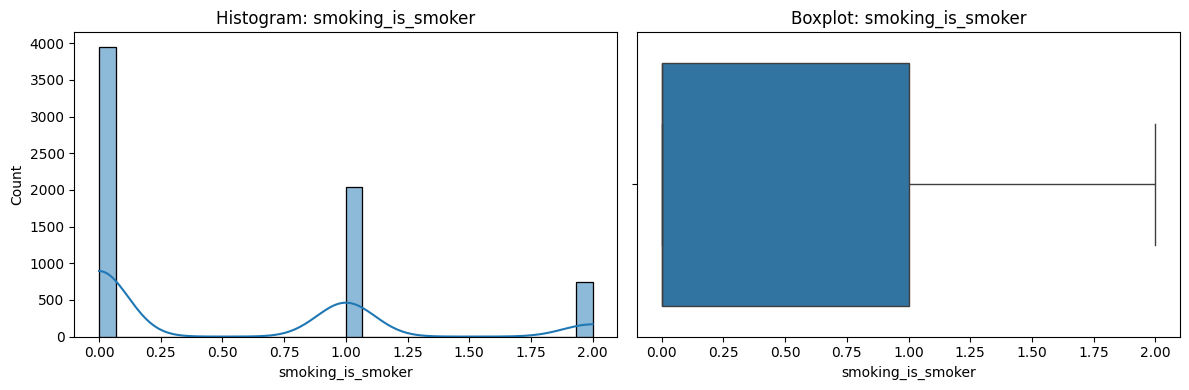

Feature: smoking_smoking_years
Type: float64
Missing: 32.69%
Unique values (1142): [0.   1.86 8.92 7.68 4.53 4.28 2.03 7.41 6.89 7.83] ...
Mean: 4.004, Std: 16.410, Min: 0.0, Max: 122.94
Outliers: 878 (8.78%)
Correlation with Y: 0.001


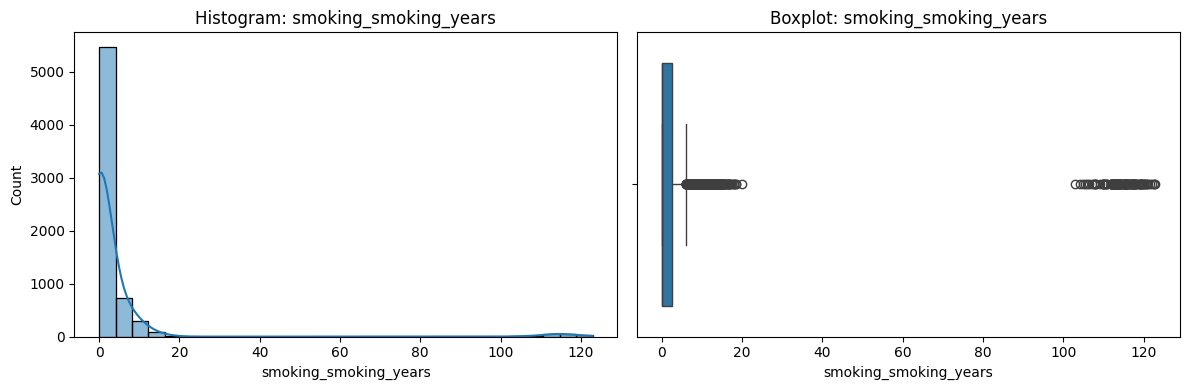

Feature: smoking_total_heavy_smokers
Type: float64
Missing: 32.69%
Unique values (8): [0. 1. 2. 3. 6. 5. 4. 9.]
Mean: 0.013, Std: 0.205, Min: 0.0, Max: 9.0
Outliers: 48 (0.48%)
Correlation with Y: -0.007


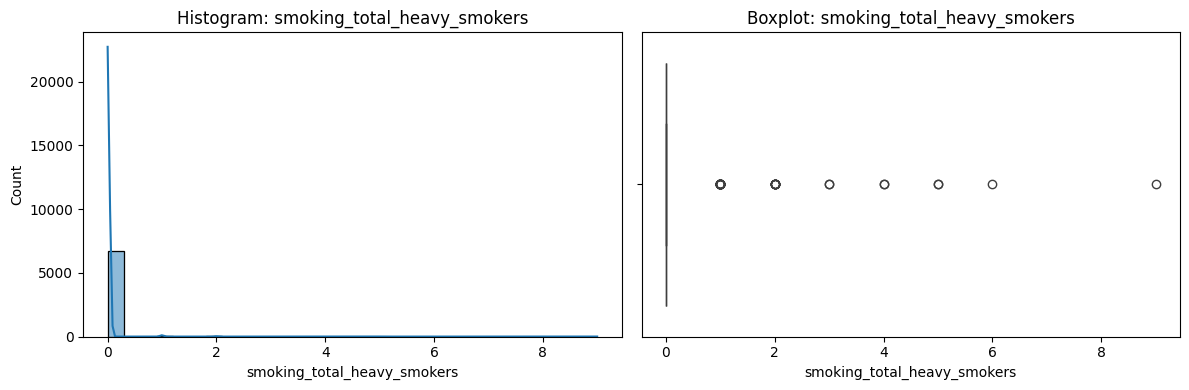

In [ ]:
analyze_feature_group(df, prefix_groups["smoking"])


In [ ]:
df.describe()

,int_date,demog_capitationcoefficient,demog_customer_age,smoking_is_smoker,smoking_smoking_years,smoking_total_heavy_smokers,lab_b_hcg_abs_last_value,lab_NT_MoM_last_value,lab_weight_at_lab_time_last_value,lab_num_of_fetuses_last_value,...,match_aspirin_after,match_pdf_after,Y,essential_hypertension_sum,pregnancy_hypertension_sum,preeclampsia_sum,eclampsia_sum,labs_sum,match_count,match_strength
count,10000.000000,9991.000000,9991.000000,6731.000000,6731.000000,6731.000000,9999.000000,9961.000000,10000.000000,10000.0,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,45231.350200,0.720975,29.729657,0.522953,4.004316,0.013074,45.846115,1.041783,63.824700,1.0,...,0.011700,0.011200,0.043200,0.010000,0.011100,0.012800,0.001700,0.004900,0.053200,0.053200
std,26278.437077,0.099963,4.938347,0.684926,16.410500,0.205008,33.349212,0.350041,12.540769,0.0,...,0.107537,0.105241,0.203317,0.099504,0.104775,0.112416,0.041198,0.069832,0.270513,0.270513
min,43.000000,0.430000,16.000000,0.000000,0.000000,0.000000,4.300000,0.110000,36.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22503.250000,0.730000,26.000000,0.000000,0.000000,0.000000,24.800000,0.830000,55.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45409.500000,0.740000,29.000000,0.000000,0.000000,0.000000,37.000000,0.990000,61.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68150.750000,0.770000,33.000000,1.000000,2.415000,0.000000,56.000000,1.200000,70.000000,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,90265.000000,1.180000,51.000000,2.000000,122.940000,9.000000,516.900000,7.860000,152.000000,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000


In [ ]:
df.head(2).T

,0,1
int_date,24163,51373
demog_capitationcoefficient,0.73,0.79
demog_customer_age,33.0,34.0
smoking_is_smoker,0.0,1.0
smoking_smoking_years,0.0,1.86
...,...,...
labs_sum,0,0
clinical_sheet,שבוע 8\n\nתלונות: המטופלת מתלוננת על בחילות בב...,שבוע 8 להיריון\n\nתלונות: המטופלת מתלוננת על ב...
match_count,0,0
no_match,True,True


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
4_diag_88_days_since_last_diag,10000
4_diag_90_days_since_last_diag,9999
4_diag_126_days_since_last_diag,9999
4_diag_106_days_since_last_diag,9999
4_diag_136_days_since_last_diag,9999
...,...
labs_sum,0
clinical_sheet,0
match_count,0
no_match,0


In [ ]:
df.isnull().mean().sort_values(ascending=False)

,0
4_diag_88_days_since_last_diag,1.0000
4_diag_90_days_since_last_diag,0.9999
4_diag_126_days_since_last_diag,0.9999
4_diag_106_days_since_last_diag,0.9999
4_diag_136_days_since_last_diag,0.9999
...,...
labs_sum,0.0000
clinical_sheet,0.0000
match_count,0.0000
no_match,0.0000


# Model

In [ ]:
leakage_columns = [
    # Target
    'Y',

    # Post-label source flags
    'match_diag_after',
    'match_measure_after',
    'match_rasham_after',
    'match_aspirin_after',
    'match_pdf_after',

    # Diagnostic subtype counts (all derived from data after prediction point)
    'secondary_hypertension_sum',
    'essential_hypertension_sum',
    'hypertensive_heart_disease_sum',
    'hypertensive_chronic_kidney_disease_sum',
    'hypertensive_heart_and_chronic_kidney_disease_sum',
    'pregnancy_hypertension_sum',
    'preeclampsia_sum',
    'eclampsia_sum',
    'labs_sum',
]


X = df.drop(columns=leakage_columns)

KeyError: "['match_diag_after', 'match_measure_after', 'secondary_hypertension_sum', 'hypertensive_heart_disease_sum', 'hypertensive_chronic_kidney_disease_sum', 'hypertensive_heart_and_chronic_kidney_disease_sum'] not found in axis"